In [1]:
# SETUP CODE - PlEASE RUN THIS ONCE WHEN YOU STARTUP YOUR CODESPACE

# RUN FILE
%run "test/week4_test.ipynb"

# Week 4 - Basic Data Analytics & Data Visualisation

## Introduction

This notebook is designed to guide you through the fundamentals of basic data analytics and visualization, covering topics such as descriptive statistics, inferential statistics, exploratory data analysis (EDA) including pandas profiling, and data visualization using Matplotlib.

By the end of this notebook, you should have a foundational understanding of:

- Descriptive statistics and their application.
- Conducting correlation tests to explore relationships between variables.
- Exploring data distributions and detecting outliers.
- Generating insightful EDA reports using `pandas-profiling`.
- Utilizing Matplotlib for data visualization.

## Import libraries needed for this notebook

In [4]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
  Using cached ydata_profiling-4.12.1-py2.py3-none-any.whl.metadata (20 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached pydantic-2.10.4-py3-none-any.whl.metadata (29 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached phik-0.12.4-cp39-cp39-win_amd64.whl.metadata (5.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached statsmodels-0.14.4-cp39-cp39-win_amd64.whl.metadata (9.5 kB)
  Using cached typeguard-4.4.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached numba-0

    click (>=7.*)
           ~~~~^
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasette 0.58.1 requires uvicorn~=0.11, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Note: you may need to restart the kernel to use updated packages.


    click (>=7.*)
           ~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport

# Data Visualization with Matplotlib
### Basic Plotting

Basic plotting is fundamental for visualizing data trends and relationships. Explore basic plotting using Matplotlib for line plots, scatter plots, and bar plots. 

In [44]:
# Sample data
x_values = np.linspace(0, 10, 100)
y_values_line = np.sin(x_values)
x_values_scatter = np.random.rand(30)
y_values_scatter = np.random.rand(30)
categories = ['Category A', 'Category B', 'Category C']
values_bar = [25, 50, 30]

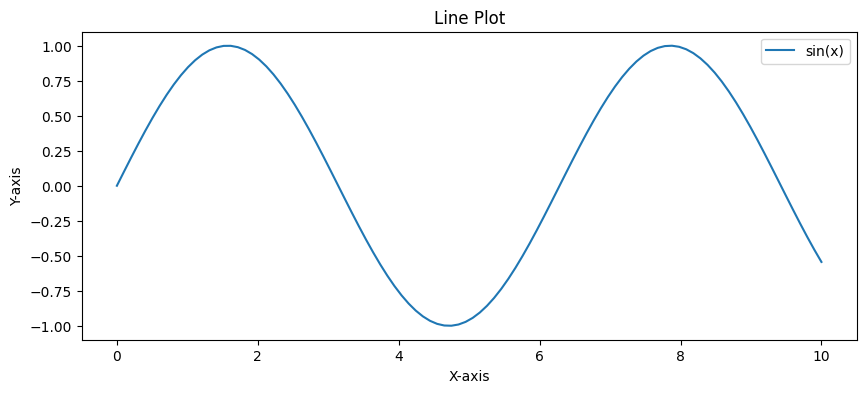

In [45]:
# Line plot
plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values_line, label='sin(x)')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

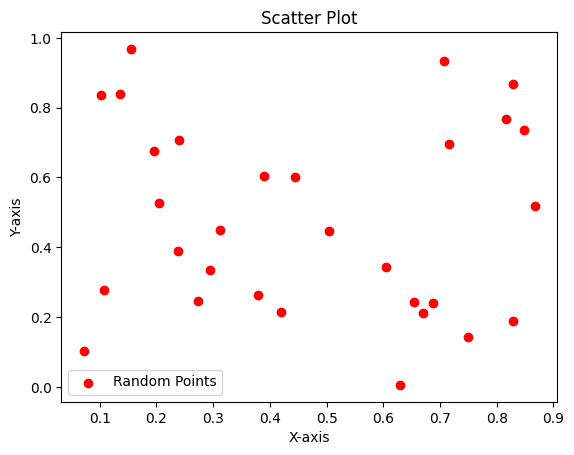

In [46]:
# Scatter plot
plt.scatter(x_values_scatter, y_values_scatter, color='red', marker='o', label='Random Points')
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

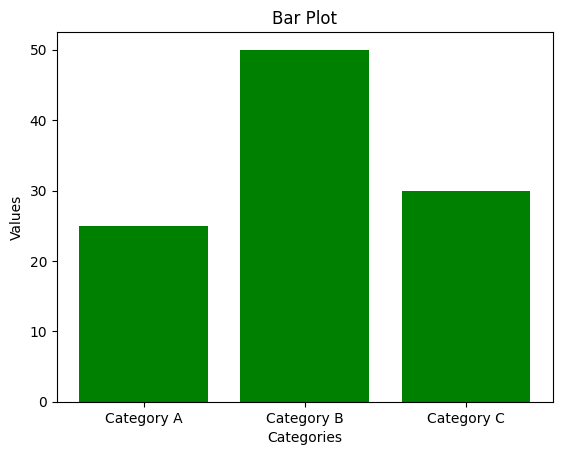

In [47]:
# Bar plot
plt.bar(categories, values_bar, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

### Multiple Plots

Create subplots and configure figures to combine different types of plots. Multiple plots help us present various aspects of the data in a single visualization.

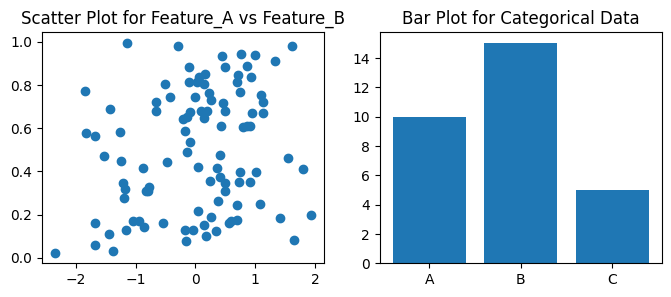

In [48]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Scatter plot
axes[0].scatter(data['Feature_A'], data['Feature_B'])
axes[0].set_title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
axes[1].bar(data_bar['Category'], data_bar['Values'])
axes[1].set_title('Bar Plot for Categorical Data')

plt.show()


#### Alternate Method

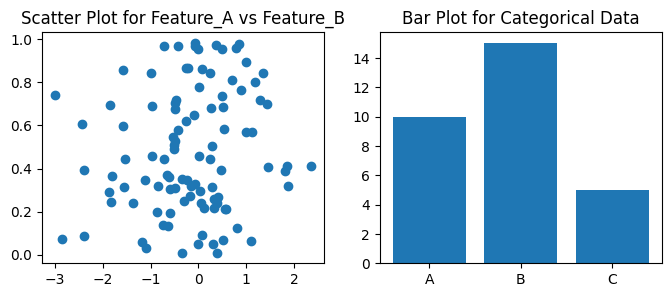

In [145]:
data = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})

# Subplots
plt.figure(figsize=(8,3))

# Scatter plot
plt.subplot(1,2,1)
plt.scatter(data['Feature_A'], data['Feature_B'])
plt.title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
plt.subplot(1,2,2)
plt.bar(data_bar['Category'], data_bar['Values'])
plt.title('Bar Plot for Categorical Data')

plt.show()

### Advanced Distribution Plot Types

Advanced plot types provide additional insights into the distribution and spread of the data. Explore advanced plot types like histograms, box plots, and violin plots, using matplotlib & seaborn

- Histograms: Good for understanding the overall distribution and frequency of data values.
- Box Plots: Useful for summarizing the central tendency and spread of data, as well as identifying outliers.
- Violin Plots: Provide a combination of box plot and density plot information, offering insights into distribution shape and density.

C:\Users\gb191\AppData\Local\Temp\ipykernel_27636\2073741840.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])


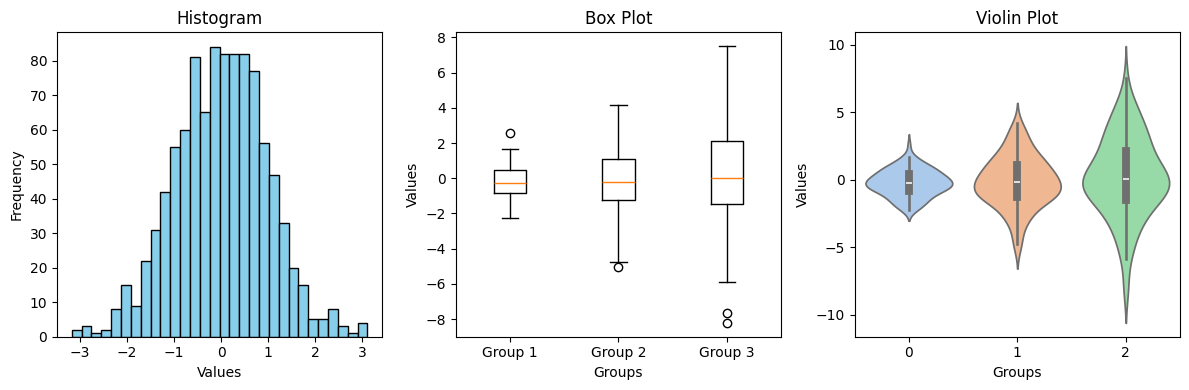

In [146]:
# Sample data
data_histogram = np.random.normal(0, 1, 1000)  # Normally distributed data
data_box_violin = [np.random.normal(0, 1, 100), np.random.normal(0, 2, 100), np.random.normal(0, 3, 100)]

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data_histogram, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=data_box_violin, palette='pastel')
plt.title('Violin Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Three-Dimensional Plots and Colouring
There may be some cases where three-dimensional plots are required. Matplotlib also has the ability to use a colour bar to add greater depth to the plot.

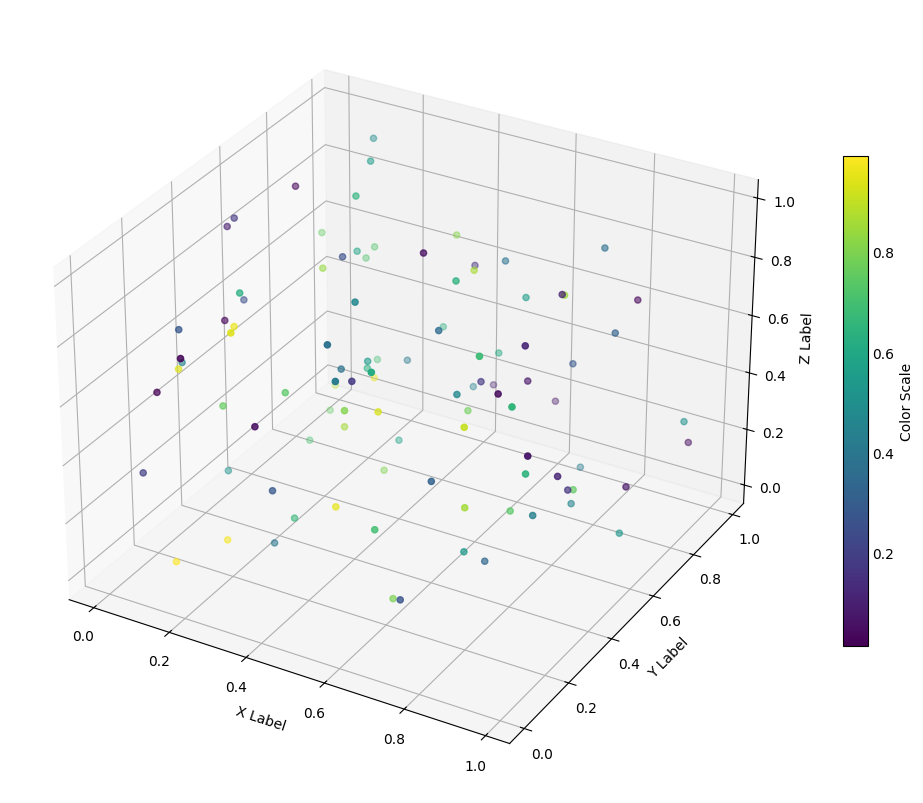

In [154]:
# Generate some example data
np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
colours = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colours, cmap='viridis')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a color bar
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5)
color_bar.set_label('Color Scale')

# Show the plot
plt.show()

# Statistical Analysis

### Descriptive Statistics

In this section, we'll cover basic descriptive statistics, including mean, median, mode, and measures of dispersion. Descriptive statistics help us summarize and understand the main features of a dataset.

Mean: 4.83
Median: 5.5
Mode: 6
Min: 0
Max: 9


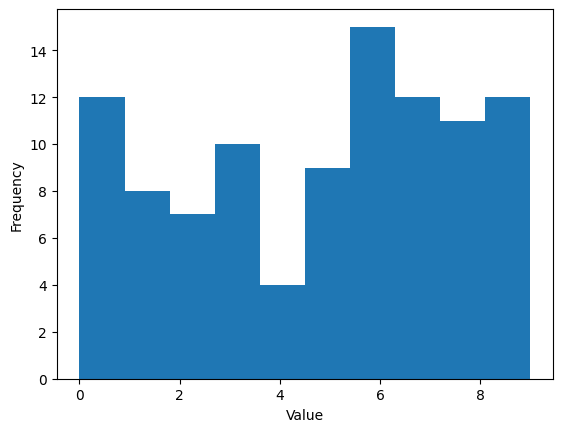

In [53]:
# Create a DataFrame for Step 1 - Descriptive Statistics
rand_vals = np.random.randint(0,10,100)
data_descriptive = pd.DataFrame({'Values': rand_vals})


# Calculating mean, median, mode
mean_value = data_descriptive['Values'].mean()
median_value = data_descriptive['Values'].median()
mode_value = data_descriptive['Values'].mode().iloc[0] 
min_value = data_descriptive["Values"].min()
max_value = data_descriptive["Values"].max()

#Note: if there are multiple values for mode, a dataframe of results would be returned unless .iloc[0] included

print(f"Mean: {mean_value}\nMedian: {median_value}\nMode: {mode_value}\nMin: {min_value}\nMax: {max_value}")

plt.hist(rand_vals)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


### **Correlation Tests**

Correlation analysis helps us understand the strength (indicated by the magnitude of the coefficient) as well as the direction (indicated by the sign of the coefficient) of the relationship between two variables. The Pearson Correlation and Spearman Correlation are amongst the most popular methods to calculate correlation. We will explore these two methods using the scipy stats library in Python. There are some key differences between these two methods:

#### Pearson Correlation
Also known as linear correlation, measures the linear relationship between two continuous variables. 
$$
r = \frac{\sum_{}\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}{\sqrt{\sum_{}\left(x_{i} - \bar{x}\right)^{2}\sum_{}\left(y_{i} - \bar{y}\right)^{2}}} \\
\\
Where: \\
x_{i} = x \: samples \\
y_{i} = y \: samples \\
\bar{x} = mean \:  of \: x \\
\bar{y} = mean \: of \: y \\
$$

Before calculating the Pearson's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Variables are quantitative - continuous
3. Data is paired - each x value is associated with a y value
4. Observations are independent
5. Data is normally distributed
6. Minimal outliers in the data

#### Spearman Correlation
Spearman Correlation measures a monotonic relatoinship between two variables based on the rank of the data. A monotonic relationship means the size of one variable increases whilst the other variable also increases, or when the size of one variable increases whilst the other decreases. It is a relationship between two variables such that when there is a change in one variable in a given direction, the other always changes in the same direction (either in the direction of the first variable, or in the opposite direction). 

$$
r_{s} = 1- \frac{6\sum_{}d^{2}}{n\left(n^{2} - 1\right)} \\
\\
Where: \\
n = number \: of \: obervations \\
d = difference \: between \: ranks \\
$$

The rank is simply the position of the data point in descending order. E.g. for the data points [10, 5, 21, 3] the rank is [2, 3, 1, 4]

Before calculating the Spearman's coefficient, the data needs to meet several assumptions:
1. Data sample is random and representative of the whole population
2. Data is paired - each x value is associated with a y value
3. Observations are independent
5. Variables are ordinal or continuous
6. The data does not need to be normally distributed



Both coefficients range from -1 to 1, indicating the strength and direction of the relationship.

Understanding these correlation coefficients is essential for choosing the appropriate method based on the nature of your data and the relationship you are investigating.

In [4]:
# Sample data
data_corr_x = pd.Series([1, 2, 3, 4, 5])
data_corr_y = pd.Series([2, 3, 4, 5, 6])

# Pearson correlation
pearson_corr, _ = stats.pearsonr(data_corr_x, data_corr_y)

# Spearman rank correlation
spearman_corr, _ = stats.spearmanr(data_corr_x, data_corr_y)

print(f"Pearson Correlation: {pearson_corr}, Spearman Correlation: {spearman_corr}")


Pearson Correlation: 1.0, Spearman Correlation: 0.9999999999999999


In [50]:
def subplot_corr(x: np.ndarray, y: np.ndarray, data_shape: str, subplot_rows: int, subplot_cols: int, subplot_pos: int):
    """
    Create a subplot with a scatterplot of two arrays against each other. 
    Also calculates the pearson and spearman coefficients and displays them on the plot
    
    Params:
    x: first array
    y: second array
    data_shape: string used in title to explain what shape y follows
    subplot_rows: number of rows in subplot
    subplot_cols: number of columns in subplot
    subplot_pos: position of current plot
    """
    pearson_corr, _ = stats.pearsonr(x, y)
    pearson_corr = np.round(pearson_corr,2)
    spearman_corr, _ = stats.spearmanr(x, y)
    spearman_corr = np.round(spearman_corr,2)

    plt.subplot(subplot_rows, subplot_cols, subplot_pos)
    plt.scatter(x,y)
    plt.title(f"For {data_shape} Data\nPearson Correlation: {pearson_corr}\nSpearman Correlation: {spearman_corr}")

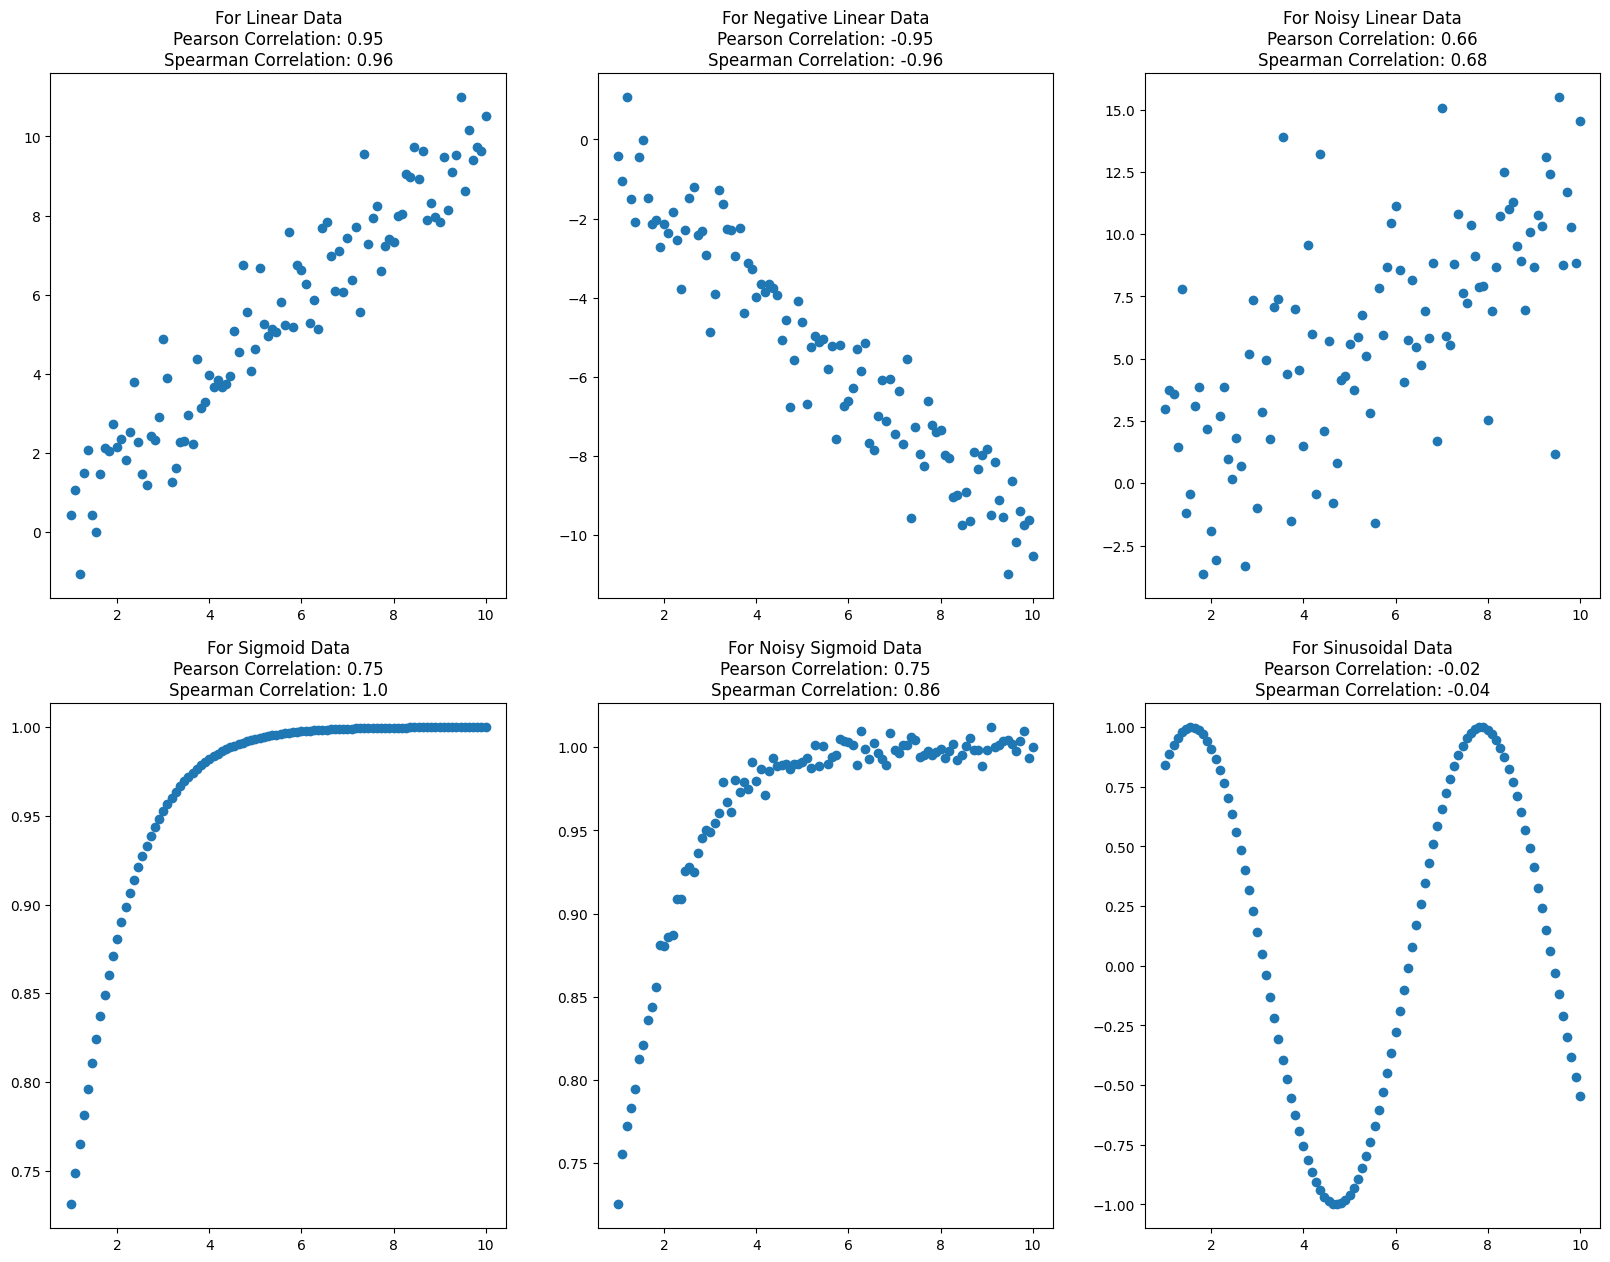

In [113]:
linear_x = np.linspace(1,10,100)

linear_y = linear_x + np.random.normal(0,1,100)
linear_y_negative = -linear_y
linear_y_noisy = linear_x + np.random.normal(0,3,100)
sigmoid_y = 1/ (1+np.exp(-linear_x))
sigmoid_y_noisy = 1/ (1+np.exp(-linear_x)) + + np.random.normal(0,0.005,100)
parabolic_y = np.sin(linear_x)

y_dict = {"Linear"        : linear_y, 
        "Negative Linear" : linear_y_negative, 
        "Noisy Linear"    : linear_y_noisy, 
        "Sigmoid"         : sigmoid_y, 
        "Noisy Sigmoid"   : sigmoid_y_noisy, 
        "Sinusoidal"      : parabolic_y
}

y_df = pd.DataFrame(y_dict)

plt.figure(figsize=(20,15))

i = 1
for col in y_df:
    subplot_corr(linear_x, y_df[col], col, 2, 3 ,i)
    i+=1
plt.show()
    

## Exploratory Data Analysis (EDA)

### Understanding Data Distributions

Understanding data distributions is crucial for gaining insights into the central tendencies and shapes of datasets. Let's explore descriptive statistics like mean, median, skewness, and kurtosis. 

Two key statistical techniques used to determine the shape of a frequency distribution are Sknewness and Kurtosis. A frequency distribution represents the number of occurrences of each value within a dataset. 
- Skewness measures the asymmetry of a distribution. It indicates whether the data is skewed to the left (negatively skewed) or to the right (positively skewed).
  - Symmetric (Skew ~= 0): The distribution looks the same to the left and right of the center point. In this case, the mean, median, and mode are equal, and there is no skewness.
  - Positive Skewness (Skew > 0): The right tail is longer than the left tail, indicating that the concentration of frequencies is more towards higher values. Here, the mean is greater than the median. 
  - Negative Skewness (Skew < 0): The left tail is longer than the right tail, indicating that the concentration of frequencies is more towards lower values. Here, the mean is less than the median. <br><br>
- Kurtosis measures the tailedness or sharpness of a distribution. It indicates whether the data has heavy or light tails compared to a normal distribution.
  - Leptokurtic (Kurtosis > 3): Has a higher peak than the normal distribution, indicating a high concentration of data points near the mean and heavier tails.
  - Mesokurtic (Kurtosis = 3): Has a peak similar to the normal distribution, indicating a moderate concentration of data points around the mean.
  - Platykurtic (Kurtosis < 3): Has a lower peak than the normal distribution, indicating a lower concentration of data points around the mean and lighter tails.

[Difference Between Sknewness and Kurtosis](https://www.geeksforgeeks.org/difference-between-skewness-and-kurtosis/)

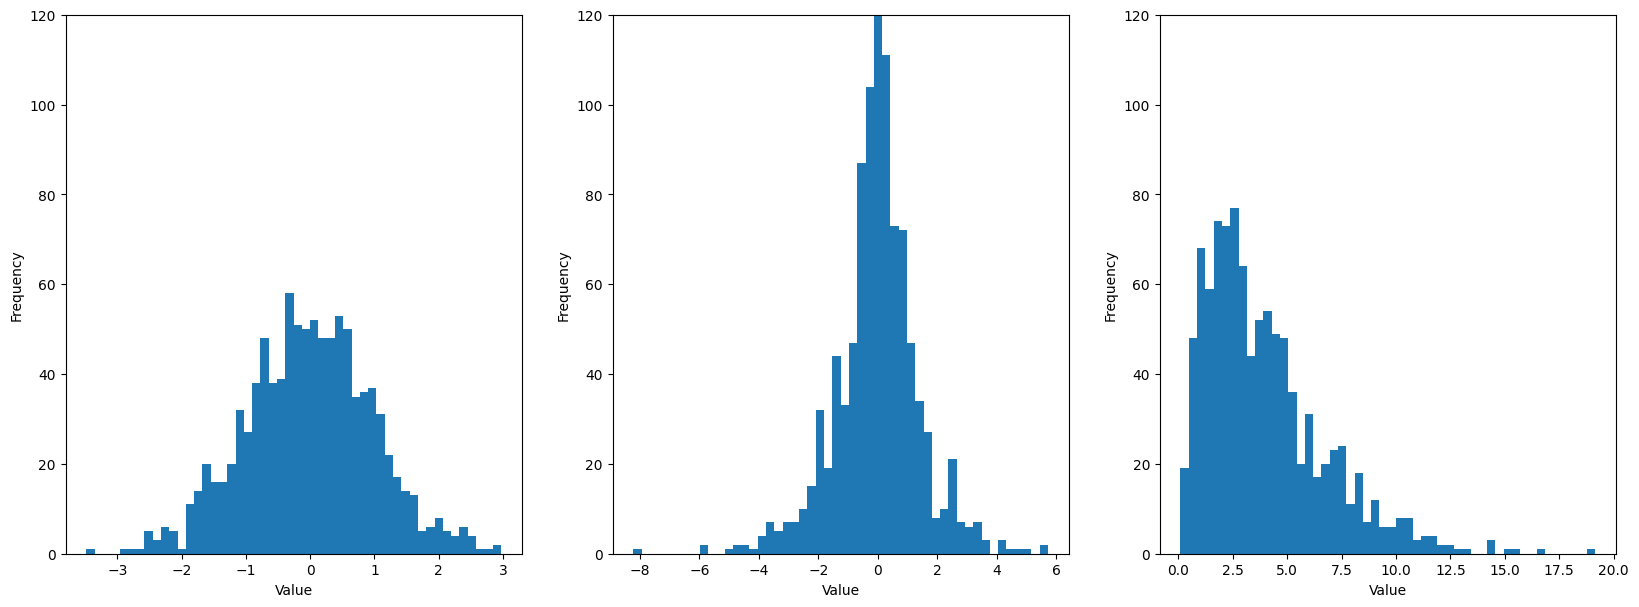

In [142]:
# Sample data for EDA
data_eda = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 1000),
    'Feature_B': np.random.laplace(0, 1, 1000),
    'Feature_C': np.random.gamma(2 ,2, 1000)
})


plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])


plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.ylim([0,120])

plt.show()

We can set density = True for our histogram plot. This means we are computing the probability of a specific value being part of that bin. It is also important when you are comparing different distribution plots that you consider the scale of the y-axis. It is also really important to ensure you use the same number of bins for each distribution, because this greatly changes how the plots look.

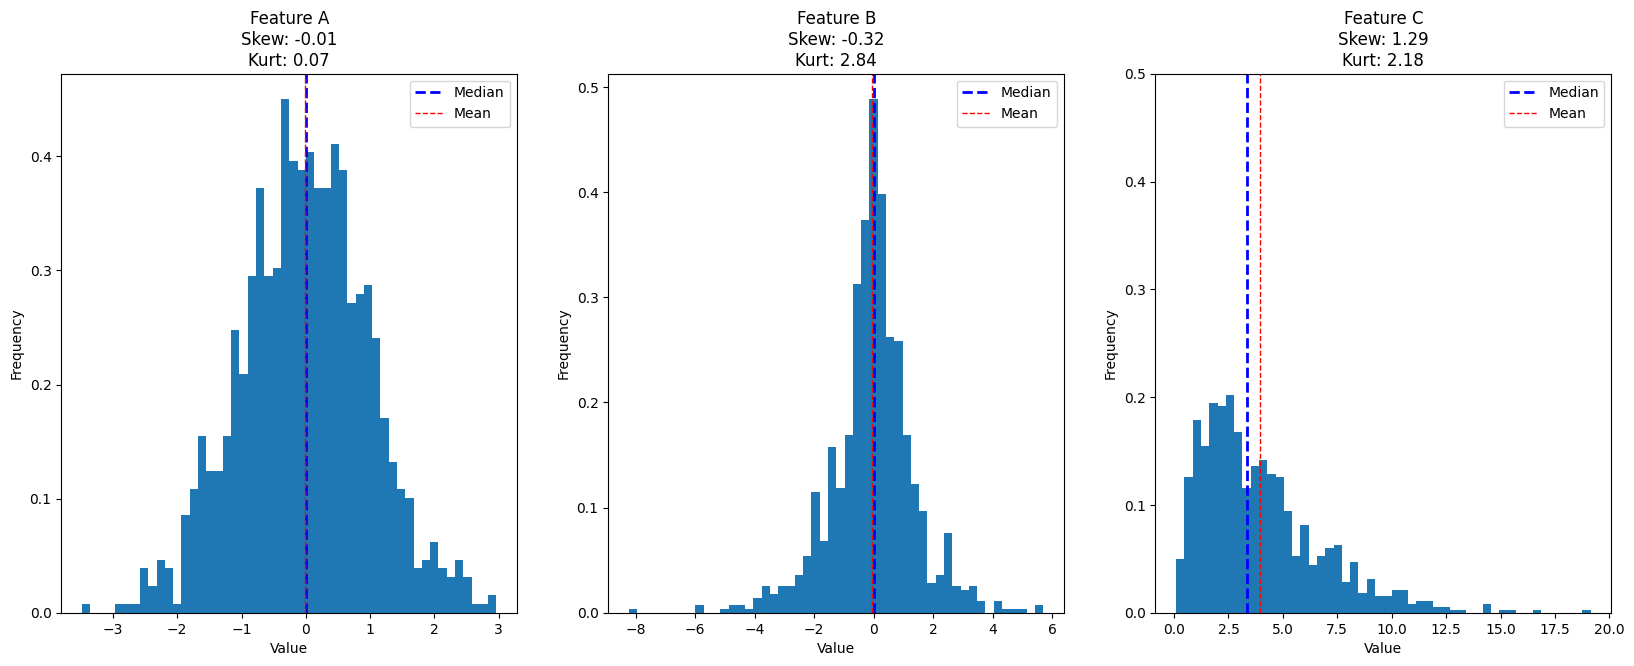

In [143]:
# Descriptive statistics for each feature column
mean_A   = data_eda["Feature_A"].mean()
median_A = data_eda["Feature_A"].median()
skew_A   = data_eda["Feature_A"].skew()
kurt_A   = data_eda["Feature_A"].kurt()

mean_B   = data_eda["Feature_B"].mean()
median_B = data_eda["Feature_B"].median()
skew_B   = data_eda["Feature_B"].skew()
kurt_B   = data_eda["Feature_B"].kurt()

mean_C   = data_eda["Feature_C"].mean()
median_C = data_eda["Feature_C"].median()
skew_C   = data_eda["Feature_C"].skew()
kurt_C   = data_eda["Feature_C"].kurt()

#Round for plotting
skew_A = np.round(skew_A,2)
kurt_A = np.round(kurt_A,2)
skew_B = np.round(skew_B,2)
kurt_B = np.round(kurt_B,2)
skew_C = np.round(skew_C,2)
kurt_C = np.round(kurt_C,2)

# Descriptive statistics for feature C column
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.hist(data_eda["Feature_A"], bins=50, density=True)
plt.axvline(median_A, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_A, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature A\nSkew: {skew_A}\nKurt: {kurt_A}")
plt.legend()

plt.subplot(1,3,2)
plt.hist(data_eda["Feature_B"], bins=50, density=True)
plt.axvline(median_B, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_B, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature B\nSkew: {skew_B}\nKurt: {kurt_B}")
plt.legend()

plt.subplot(1,3,3)
plt.hist(data_eda["Feature_C"], bins=50, density=True)
plt.axvline(median_C, color='blue', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean_C, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title(f"Feature C\nSkew: {skew_C}\nKurt: {kurt_C}")
plt.ylim([0,0.5])
plt.legend()

plt.show()


## Correlation Analysis
Explore Pearson correlation and visualize correlations using seaborn heatmaps. We will explore correlation and heatmaps in more detail during later weeks.

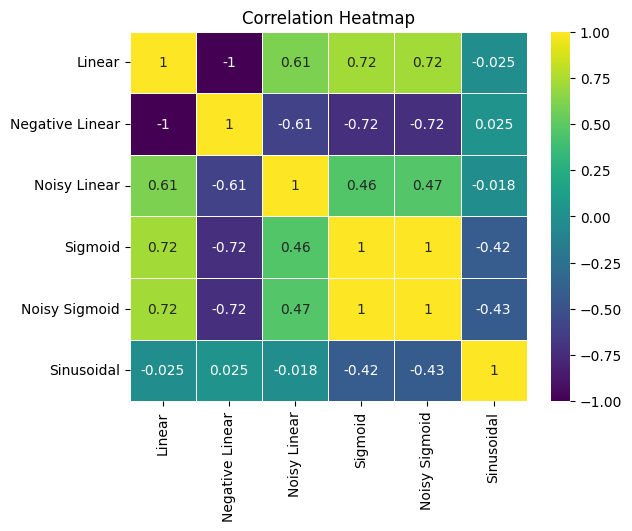

In [129]:
# Correlation matrix
corr_matrix = y_df.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap="viridis")
plt.title('Correlation Heatmap')
plt.show()


## Outlier Detection

Outlier detection is essential for understanding anomalies that may impact statistical analyses. Identify and handle outliers using visualization techniques. 

In [117]:
# Create a dataset with outliers

# Set a random seed for reproducibility
np.random.seed(42)
# Generate a dataset with a normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=100)
# Add outliers
outliers = np.array([20, 80, 90, 110])
# Combine the normal data with outliers
data_with_outliers = np.concatenate([normal_data, outliers])

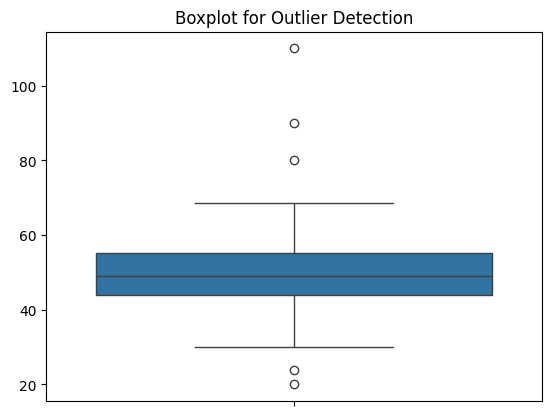

In [118]:
# Box plot for outlier detection
sns.boxplot(data=data_with_outliers)
plt.title('Boxplot for Outlier Detection')
plt.show()


### Data Distribution Exploration

Exploring data distributions helps us understand the shape and patterns within the data. Perform univariate and bivariate analysis using histograms, kernel density plots, scatter plots, and pair plots. 

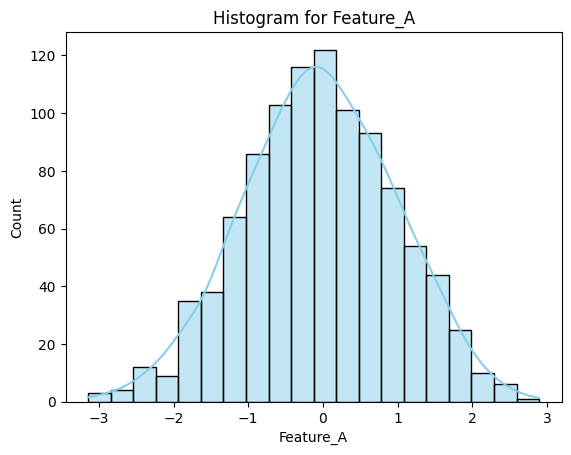

In [123]:
# Univariate analysis: Histogram
sns.histplot(data_eda['Feature_A'], kde=True, color='skyblue', bins=20)
plt.title('Histogram for Feature_A')
plt.show()


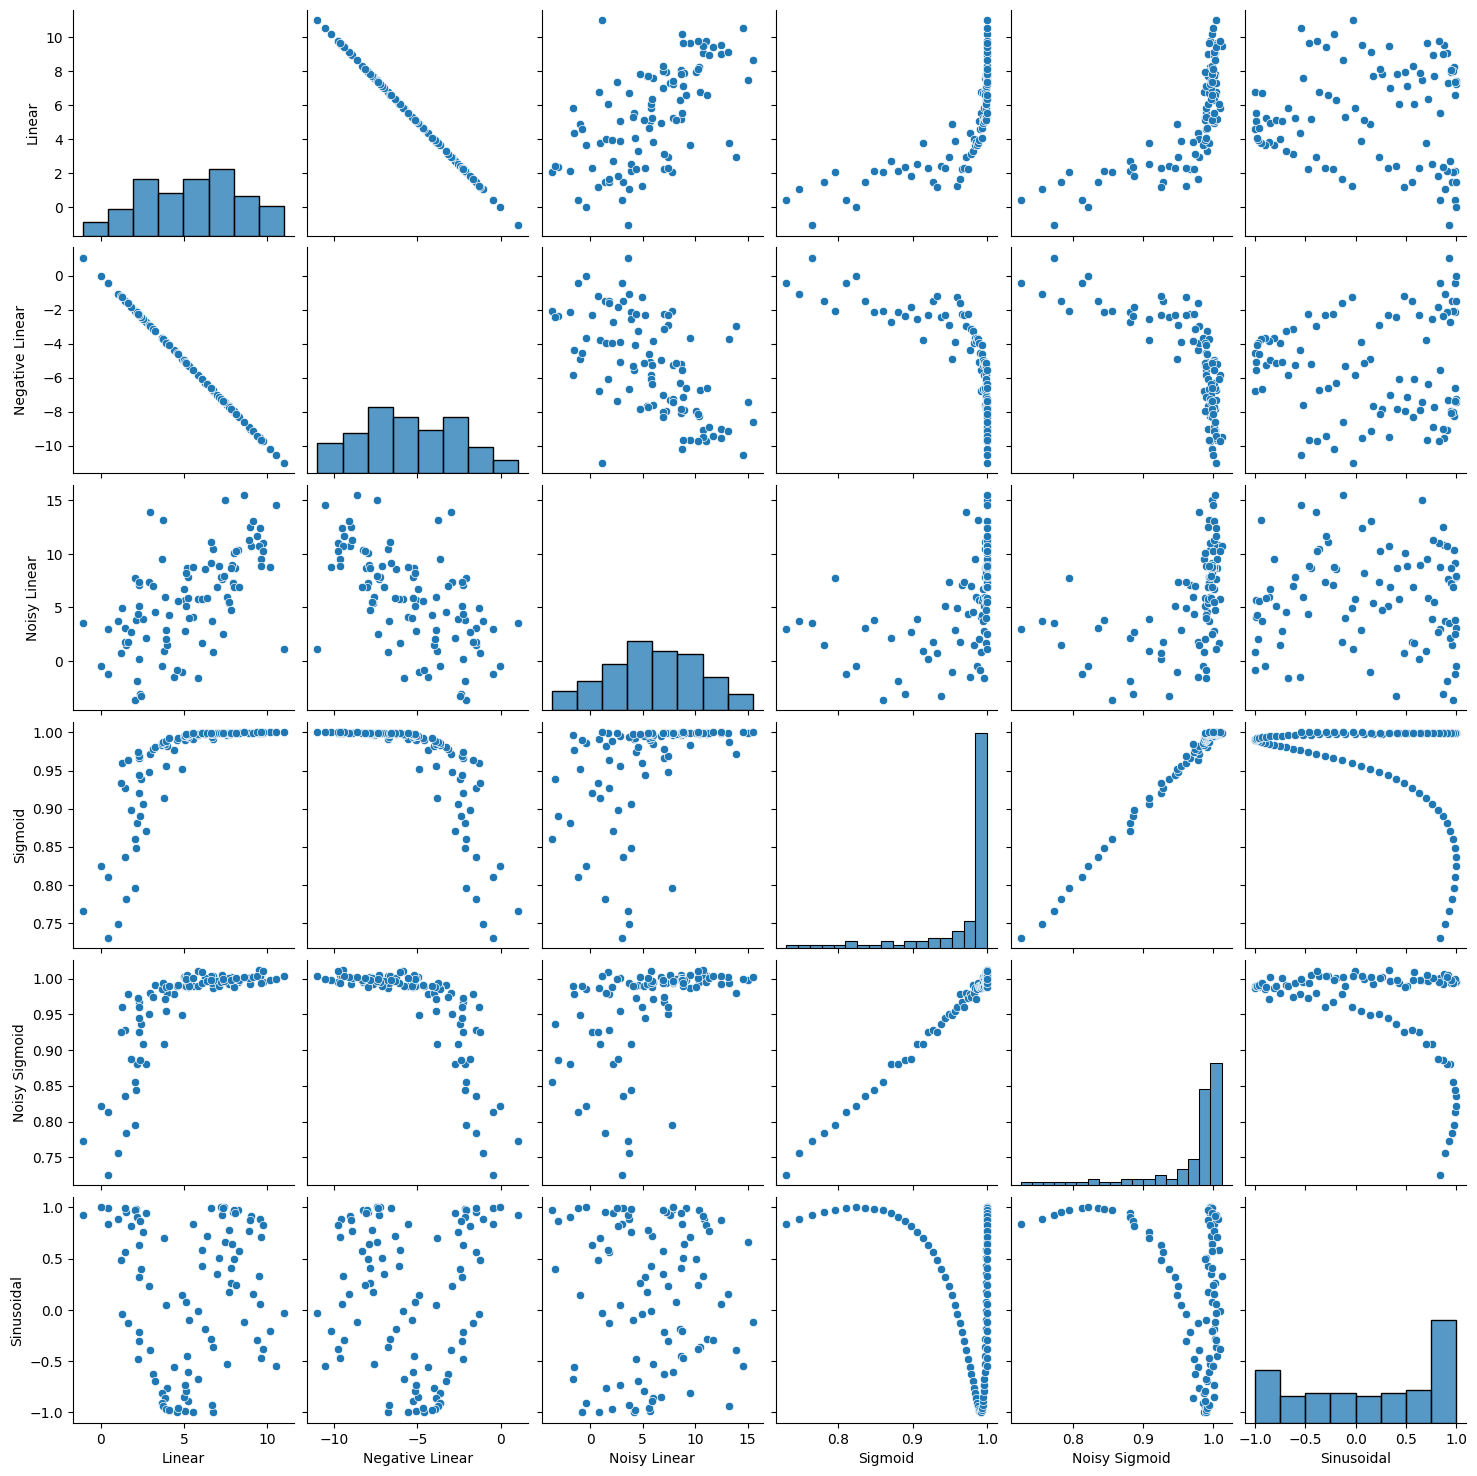

In [135]:
# Bivariate analysis: Pair plot
sns.pairplot(y_df)
plt.show()

### Pandas Profiling

pandas-profiling is a powerful library for generating profile reports from a Pandas DataFrame. It provides an overview of the dataset, including descriptive statistics, correlations, missing values, and more. It has recently had a change of library name to **ydata_profiling**

In [136]:
# Create a 100 row dataset made up of 4 numerical columns & 2 string columns

# Set a random seed for reproducibility
np.random.seed(42)
# Generate numerical columns
num_columns = {
    'Numeric1': np.random.randint(1, 100, size=100),
    'Numeric2': np.random.uniform(0, 1, size=100),
    'Numeric3': np.random.normal(50, 10, size=100),
    'Numeric4': np.random.choice([0, 1], size=100),
}
# Generate string columns
str_columns = {
    'String1': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'String2': np.random.choice(['X', 'Y', 'Z'], size=100),
}
# Create a DataFrame
df = pd.DataFrame({**num_columns, **str_columns})

# Display the first few rows of the dataset
df.head()

,Numeric1,Numeric2,Numeric3,Numeric4,String1,String2
0,52,0.280935,40.094637,1,C,Z
1,93,0.542696,44.337023,0,B,Y
2,15,0.140924,50.996514,0,B,X
3,72,0.802197,44.965243,1,B,X
4,61,0.074551,34.493366,0,A,Z


In [137]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


### Spatial plotting

In [138]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, http://smartweb.myergon.local:8080/simple/
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.3/16.2 MB 7.5 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/16.2 MB 11.2 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.2 MB 11.9 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/16.2 MB 11.1 MB/s eta 0:00:01
   ------------------------- -------------- 10.2/16.2 MB 10.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 9.2 MB/s eta 0:00:01
   ------------------------------- -------- 12.8/16.2 MB 8.8 MB/s eta 0:00:01
   ----------------------------------- ---- 14.2/16.2 MB 8.4 MB/s eta 0:00:01
   ------------------------------------- -- 15.2/16.2 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 7.6 M

    click (>=7.*)
           ~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
import geopandas as gpd

In [140]:
pwd

'c:\\LocalData\\gb191\\intro-to-python\\week4'

In [141]:
# Create a geodataframe from a local geodatabase 
gdf = gpd.read_file("/workspaces/intro-to-python/week4/data.gdb")
gdf

DataSourceError: '/workspaces/intro-to-python/week4/data.gdb' does not exist in the file system, and is not recognized as a supported dataset name.

In [26]:
# List all the methods of the geometry object in geopandas
dir(gdf.geometry[0])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_i

In [27]:
# Inspect brisbane subset
brisbane_PDAs = (gdf[gdf["LGA_NAME"] == "Brisbane"])[['LGA_NAME','PDA_NAME', 'PDA_STATUS', 'REGULATION_CODE', 'geometry']]
brisbane_PDAs

,LGA_NAME,PDA_NAME,PDA_STATUS,REGULATION_CODE,geometry
2,Brisbane,Roma Street Cross River Rail,Declared,16,"MULTIPOLYGON (((153.01846 -27.46455, 153.01848..."
3,Brisbane,Boggo Road Cross River Rail,Declared,18,"MULTIPOLYGON (((153.02958 -27.49299, 153.02995..."
7,Brisbane,Woolloongabba,Declared,21,"MULTIPOLYGON (((153.02279 -27.48250, 153.02280..."
9,Brisbane,Bowen Hills,Declared,2,"MULTIPOLYGON (((153.04039 -27.43376, 153.04051..."
12,Brisbane,Oxley,Declared,13,"MULTIPOLYGON (((152.96685 -27.55047, 152.96690..."
14,Brisbane,Herston Quarter,Declared,11,"MULTIPOLYGON (((153.02508 -27.44697, 153.02490..."
18,Brisbane,Yeronga,Declared,14,"MULTIPOLYGON (((153.02009 -27.51558, 153.02032..."
22,Brisbane,Northshore Hamilton,Declared,1,"MULTIPOLYGON (((153.08386 -27.43445, 153.08451..."
23,Brisbane,Albert Street Cross River Rail,Declared,15,"MULTIPOLYGON (((153.02764 -27.47168, 153.02749..."
26,Brisbane,Queen's Wharf Brisbane,Declared,8,"MULTIPOLYGON (((153.02371 -27.47098, 153.02401..."


In [28]:
centroids_x = []
centroids_y = []
for _, row in brisbane_PDAs.iterrows():
    centroids_x.append(row.geometry.centroid.x)
    centroids_y.append(row.geometry.centroid.y)

global_centroid_x = sum(centroids_x)/len(centroids_x)
global_centroid_y = sum(centroids_y)/len(centroids_y)


In [29]:
global_centroid_x, global_centroid_y # y is latitude and x is longitude

(153.0274899842586, -27.466948148389495)

In [30]:
pip install folium


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import folium

# Initialise folium map object
brisbane_pda_map = folium.Map(location=[global_centroid_y, global_centroid_x], zoom_start=12)  # Set the initial map location and zoom
brisbane_pda_map

In [33]:
folium.GeoJson(brisbane_PDAs).add_to(brisbane_pda_map)
brisbane_pda_map

### Examples of other visualisations
In this section, we will share some other visulisation techniques, which have been used in EQL projects. This is just to give you an idea of how data can be used/visualised, so the code won't be shared

The below visualisation shows an "accuracy metric" for each NMI in EQX region:

<img src="img/study group viz 1.png" alt="Map Visualisation" />

The below visualisation shows a layered heatmap. The back layer is a heatmap of a customers load/usage every 5 minutes in a given week. The front layer (the greyed out section), shows the responsiveness of the customer's controlled load devices

<img src="img/viz 2.png" alt="Layered Heatmap Visualisation" />

The below visualisation is a hexbin plot (hexagonal binning). Hexbin plots take in X and Y values and returns what looks somewhat similar to a scatter plot, but where the entire graphing space has been divided into hexagons and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density of each hexagonal area. An alternative way to think about these plots is that hexbins is a 2D histogram plot, in which the bins are hexagons and the color represents the number of data points within each bin.

<img src="img/viz 3.PNG" alt="hexbin Visualisation" />

Below are visualisations of GHI, DNI and DHI throughout the year in SE Queensland. GHI, DNI and DHI are three different measurements to capture the solar irradiance seen on the surface of the earth.

<img src='img/GHI_year_plot.png' alt = "GHI of Year">
<img src='img/DNI_year_plot.png' alt = "DNI of Year">
<img src='img/DHI_year_plot.png' alt = "DHI of Year">


## Challenge Task

Now it's time to see how much you have learnt from this week and last week, across all the topics: data cleaning, manipulation, analysing & visualising. Below is a synthetic dataset about the electricity consumption of 200 households in the US. Using this dataset, please complete the following:
- An EDA to see what state the data is currently in. Use whatever method you would like, but briefly describe (in a markdown cell) everything you have learnt about the dataset, prior to applying any cleaning methods.
- Apply data cleaning & manipulation techniques where required
- Apply your data analytics skills to find out useful information about the cleaned dataset, as well as any relationships between the attributes. Describe your findings in a markdown cell.
- Create at least 2 visualisations using the dataset

In [34]:
# Below is the first 5 rows of the dataset you will use for the Challenge Task. Make sure you have run the first command of this notebook for this to work

challenge_df.head()


,Household_ID,Electricity_Consumption_kWh,Region,Appliance_Count,Monthly_Bill_USD,Household_Members,Has_Solar_Panels
0,1,224.835708,South,5,107.160701,1,yes
1,2,193.086785,South,3,217.925171,1,no
2,3,232.384427,North,1,204.532060,1,yes
3,4,276.151493,West,1,139.540680,1,yes
4,5,188.292331,North,8,78.389398,2,yes


In [35]:
# Complete first EDA here

Findings of first EDA in this markdown cell:


In [36]:
# Complete data cleaning / manipulation here

In [ ]:
# Complete second EDA here

Findings of second EDA in this markdown cell

In [ ]:
# Complete visualisation 1 here

In [ ]:
# Complete visualisation 2 here